# IMAGE CARTOONIFIER

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


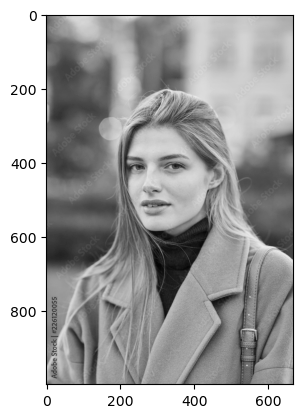

In [77]:
img = cv2.imread('girl.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

### Face detectors

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


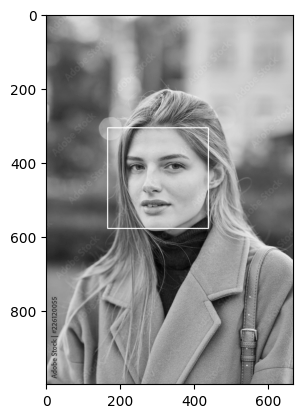

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
(x,y,w,h) = faces[0] #where the face begin
face_img = cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2) #draw a rectangle on the face
plt.imshow(face_img,cmap='gray')

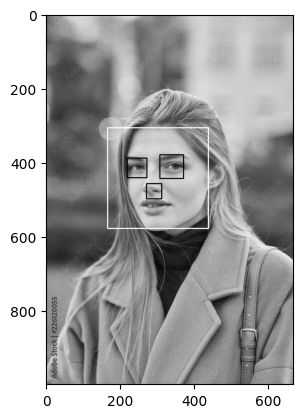

In [ ]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

# Edge detection

### I used **AdaptiveThreshold** , it is a method in OpenCV used for image thresholding to separate regions in an image based on pixel intensity values. Adaptive thresholding is a variant where the threshold value is calculated for smaller regions of the image, allowing better results in cases where lighting conditions vary across the image.

#### For a similar effect to adaptive thresholding using Prewitt, Sobel, or Laplacian, you might need to fine-tune parameters, apply additional filtering, or combine operations to achieve the desired edge detection and segmentation similar to adaptive thresholding

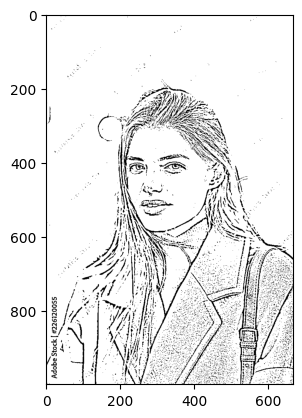

In [ ]:
#retrieving the edges for cartoon effect by using thresholding technique
getEdge = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
plt.imshow(getEdge, cmap='gray')

# Contrast enhancement

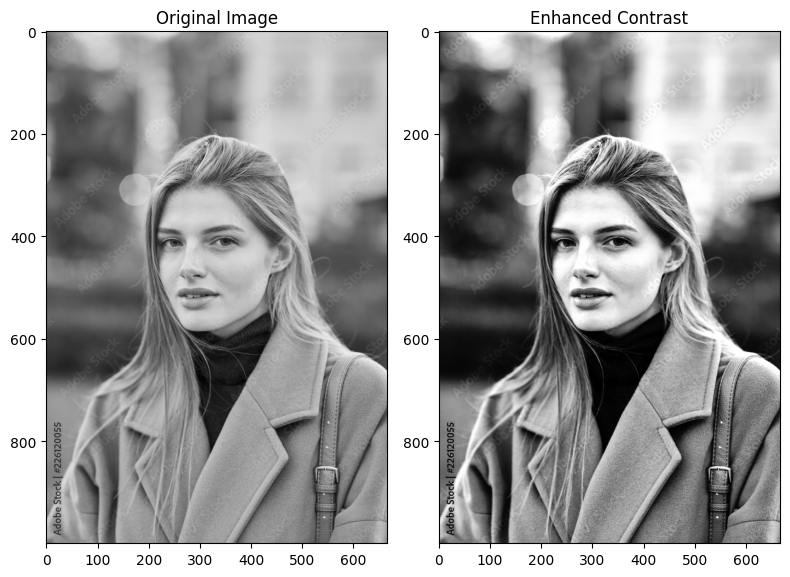

In [ ]:
def enhance_contrast(image_path):
    original_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    # Apply histogram equalization to enhance contrast
    equalized_image = cv2.equalizeHist(gray_image)

    # Display original and enhanced contrast images
    plt.figure(figsize=(8, 6))
    plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(equalized_image, cmap='gray'), plt.title('Enhanced Contrast')
    plt.tight_layout()
    plt.show()

image_path = 'girl.jpg'
enhance_contrast(image_path)


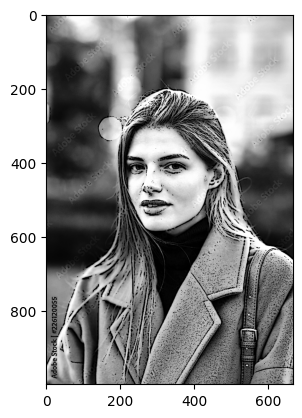

In [ ]:
equalized_image = cv2.equalizeHist(gray)
cartoonImage = cv2.bitwise_and(equalized_image, equalized_image, mask=getEdge) ##apply edging to the enhanced image
plt.imshow(cartoonImage, cmap='gray')

##### Things are getting clearer!!

### Smoothing

##### Why so? usually when we use filtering/improving apps for our pics, we want to smooth the picture to make it flawless !!

In [ ]:
def apply_blur_filters(original_image):

    filters = [
        cv2.GaussianBlur(original_image, (11, 11), 0), # gaussian_blur
        cv2.medianBlur(original_image, 11), # median_blur
        cv2.bilateralFilter(original_image, 11, 75, 75), # bilateral_filter
        cv2.boxFilter(original_image, -1, (11, 11)), #box_filter
        cv2.blur(original_image, (11, 11)) #mean_filter
        ]

    plt.figure(figsize=(15, 8))

    for i, filt in enumerate(filters, start=1):
        # Apply edge to the smoothed image
        edge_on_blurred = cv2.bitwise_and(filt, filt, mask=getEdge)

        plt.subplot(2, 3, i)
        plt.imshow(cv2.cvtColor(edge_on_blurred, cv2.COLOR_BGR2RGB))
        plt.title(f'Filtered Image {i}')

    plt.tight_layout()
    plt.show()


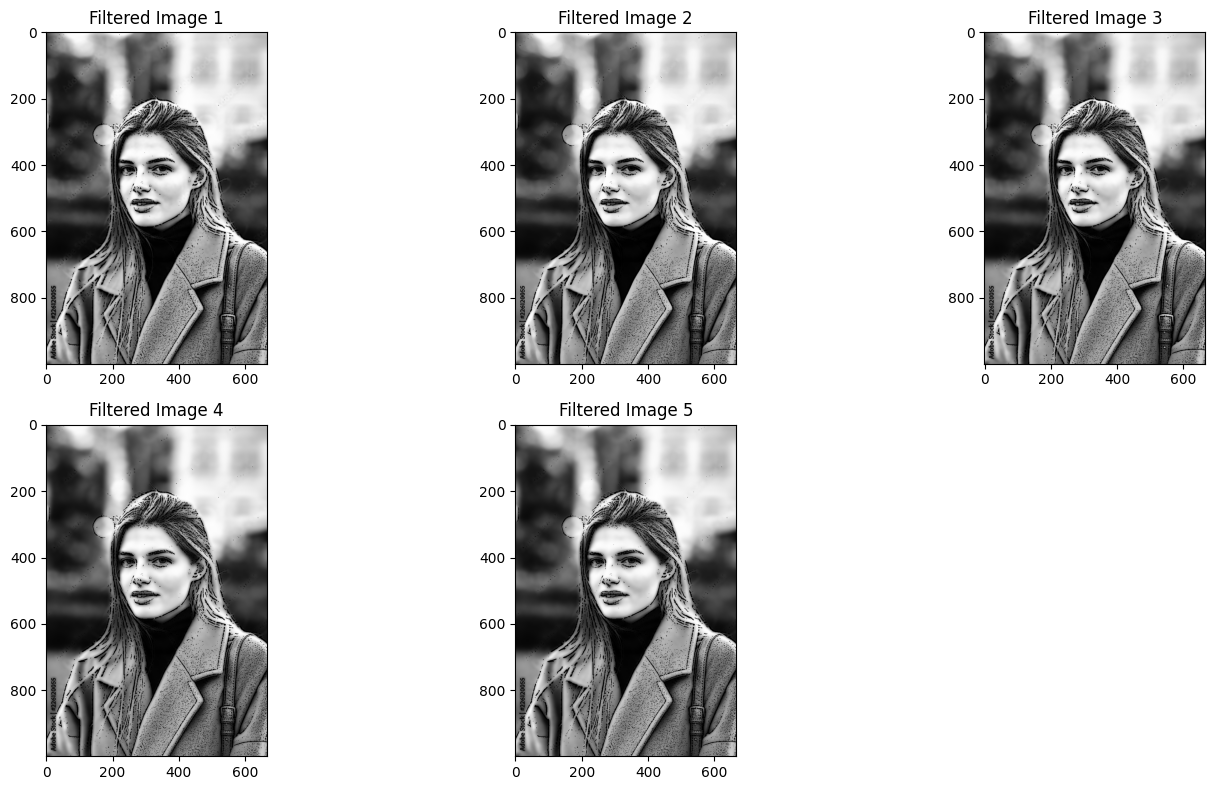

In [ ]:
gray=cv2.equalizeHist(gray)
apply_blur_filters(gray)


the results are quite similair -- due to the fact that linear filters are always the best options to smoothen the image! ( the median gave presque the same result)

## Now, the BEST PART: **AESTHETIC**!!!

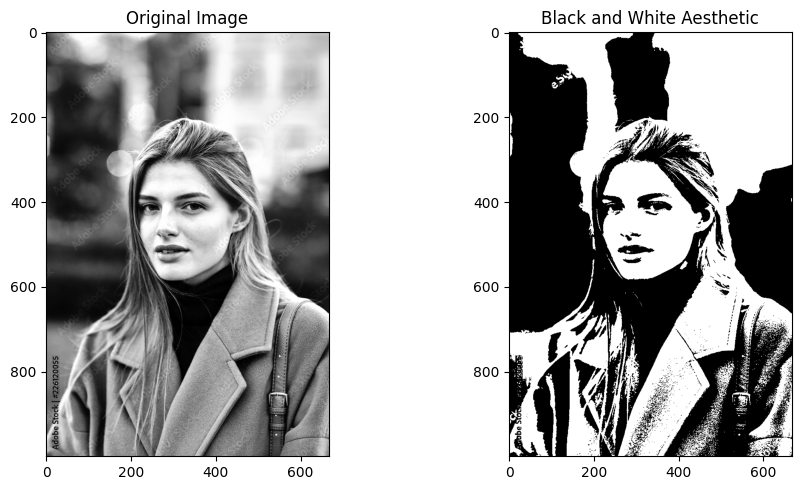

In [ ]:
def black_and_white_aesthetic(gray_image):

    # Apply thresholding for high contrast black and white
    _, black_white_image = cv2.threshold(gray_image, 130, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1), plt.imshow(gray_image,cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(black_white_image, cmap='gray'), plt.title('Black and White Aesthetic')

    plt.tight_layout()
    plt.show()

black_and_white_aesthetic(gray)


#### choosing the threshold?

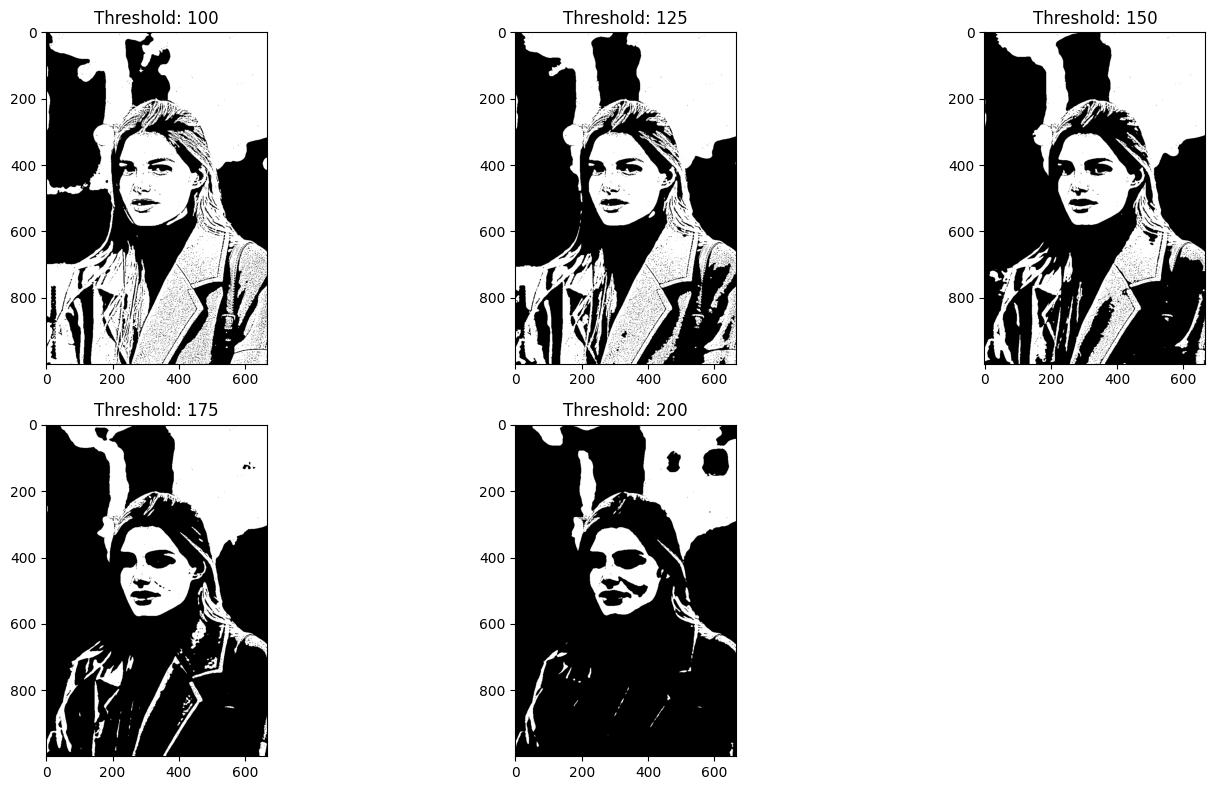

In [ ]:
# Pixels with values above threshold become white, and those below become black

equalized_image=cv2.equalizeHist(gray)
blurred_image = cv2.GaussianBlur(equalized_image, (11, 11), 0) #mean_filter
a = cv2.bitwise_and(blurred_image, blurred_image, mask=getEdge)
threshold_values = [100, 125, 150, 175, 200]  # Threshold values to test
plt.figure(figsize=(15, 8))
for i, threshold in enumerate(threshold_values, start=1):
        _, black_white_image = cv2.threshold(a, threshold, 255, cv2.THRESH_BINARY)

        plt.subplot(2, 3, i)
        plt.imshow(black_white_image, cmap='gray')
        plt.title(f'Threshold: {threshold}')

plt.tight_layout()
plt.show()
#plt.imshow(black_white_image, cmap='gray')

#### Examples!

Text(0.5, 1.0, 'Cartoon')

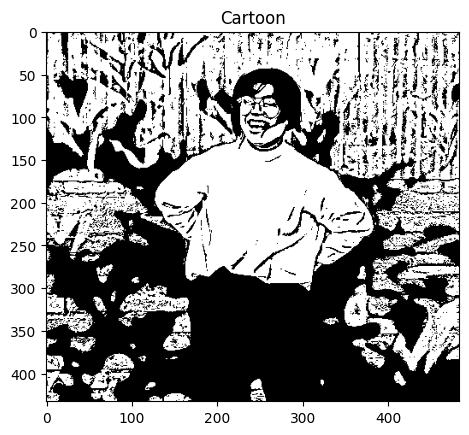

In [ ]:
img = cv2.imread('gurl.png') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

getEdge = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
corrected_image=cv2.equalizeHist(gray)
blurred_image =cv2.blur(corrected_image, (9, 9)) #mean_filter
a = cv2.bitwise_and(blurred_image, blurred_image, mask=getEdge)
_, black_white_image = cv2.threshold(a, 100, 255, cv2.THRESH_BINARY)
plt.imshow(black_white_image, cmap='gray')
plt.title("Cartoon")



Text(0.5, 1.0, 'Cartoon')

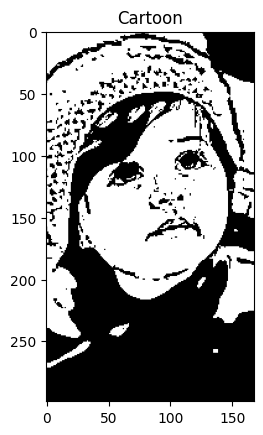

In [ ]:
img = cv2.imread('cute.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

getEdge = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
corrected_image=cv2.equalizeHist(gray)
blurred_image =cv2.blur(corrected_image, (9, 9)) #mean_filter
a = cv2.bitwise_and(blurred_image, blurred_image, mask=getEdge)
_, black_white_image = cv2.threshold(a, 100, 255, cv2.THRESH_BINARY)
plt.imshow(black_white_image, cmap='gray')
plt.title("Cartoon")



**I tried with other examples, the problem was that always the picture which have a lot of dark areas become nearly all black after transformation, so i thought of a brightness technique such logarithmic/gamma correction..etc**

## Gamma correction ( brightness )

Gamma correction adjusts the brightness or contrast of an image by using a non-linear operation that alters the intensity values.

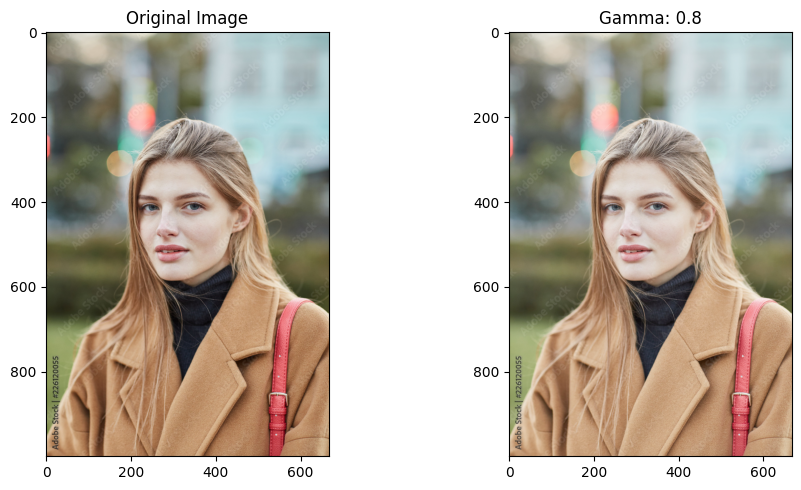

In [ ]:
def gamma_correction(image_path, gamma):
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Normalize pixel values to the range [0, 1]
    normalized_image = original_image / 255.0

    # Apply gamma correction
    corrected_image = np.power(normalized_image, gamma)
    corrected_image = np.uint8(corrected_image * 255.0)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1), plt.imshow(original_image), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(corrected_image), plt.title(f'Gamma: {gamma}')

    plt.tight_layout()
    plt.show()

image_path = 'girl.jpg'
gamma_correction(image_path, gamma=0.8)

## Resultss!!

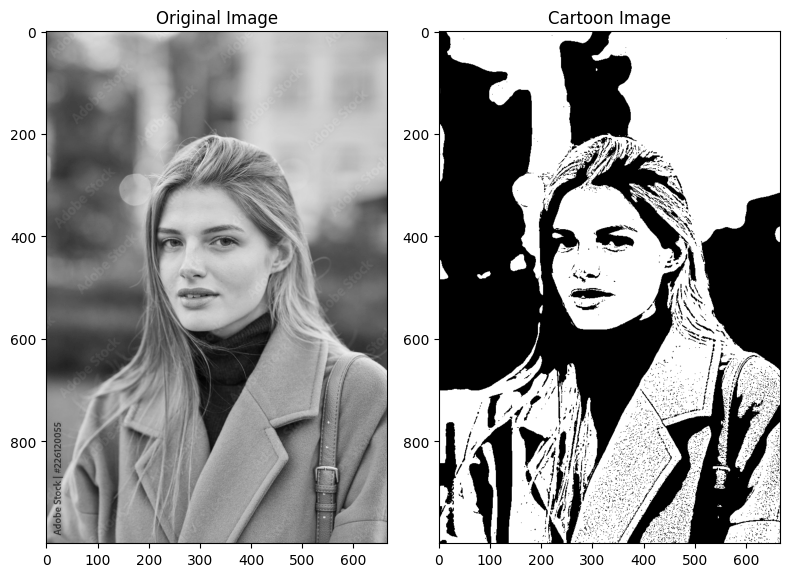

In [ ]:
img = cv2.imread('girl.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
normalized_image = gray / 255.0

# Apply gamma correction
corrected_image = np.power(normalized_image, 0.8 / 1.0)
corrected_image = np.uint8(corrected_image * 255.0)

getEdge = cv2.adaptiveThreshold(corrected_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
corrected_image=cv2.equalizeHist(corrected_image)
blurred_image =cv2.blur(corrected_image, (9, 9)) #mean_filter
a = cv2.bitwise_and(blurred_image, blurred_image, mask=getEdge)
_, black_white_image = cv2.threshold(a, 110, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(8, 6))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(black_white_image, cmap='gray'), plt.title('Cartoon Image')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Cartoon')

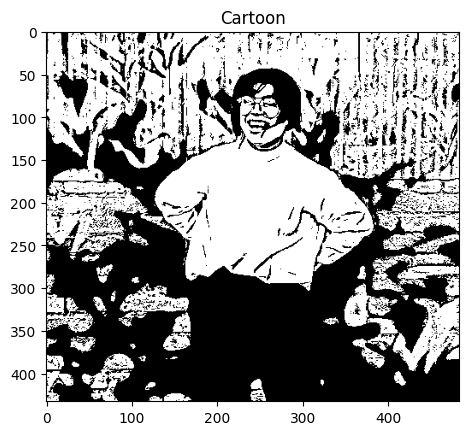

In [ ]:
img = cv2.imread('gurl.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
normalized_image = gray / 255.0

corrected_image = np.power(normalized_image, 0.8 / 1.0)
corrected_image = np.uint8(corrected_image * 255.0)

getEdge = cv2.adaptiveThreshold(corrected_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
corrected_image=cv2.equalizeHist(corrected_image)
blurred_image =cv2.blur(corrected_image, (9, 9)) #mean_filter
a = cv2.bitwise_and(blurred_image, blurred_image, mask=getEdge)
_, black_white_image = cv2.threshold(a, 100, 255, cv2.THRESH_BINARY)
plt.imshow(black_white_image, cmap='gray')
plt.title("Cartoon")



Text(0.5, 1.0, 'Cartoon')

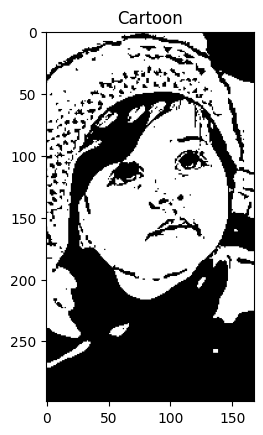

In [ ]:
img = cv2.imread('cute.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
normalized_image = gray / 255.0

corrected_image = np.power(normalized_image, 0.8 / 1.0)
corrected_image = np.uint8(corrected_image * 255.0)

getEdge = cv2.adaptiveThreshold(corrected_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
corrected_image=cv2.equalizeHist(corrected_image)
blurred_image =cv2.blur(corrected_image, (9, 9)) #mean_filter
a = cv2.bitwise_and(blurred_image, blurred_image, mask=getEdge)
_, black_white_image = cv2.threshold(a, 100, 255, cv2.THRESH_BINARY)
plt.imshow(black_white_image, cmap='gray')
plt.title("Cartoon")


# APP

U can use this process as an app to apply it to an image x if any face is detected ( we want to cartoonify people )

In [2]:
def Cartoonifier(path, gamma=0.8, thresh=100):
    img = cv2.imread(path)  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detect face
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) > 0:  # Check if any faces are detected
        (x, y, w, h) = faces[0]  # where the face begins

        normalized_image = gray / 255.0
        # Apply gamma correction
        corrected_image = np.power(normalized_image, gamma / 1.0)
        corrected_image = np.uint8(corrected_image * 255.0)

        getEdge = cv2.adaptiveThreshold(corrected_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
        corrected_image = cv2.equalizeHist(corrected_image)
        smoothed_image = cv2.GaussianBlur(corrected_image, (9, 9),0)  # gaussian_filter
        a = cv2.bitwise_and(smoothed_image, smoothed_image, mask=getEdge)
        _, black_white_image = cv2.threshold(a, thresh, 255, cv2.THRESH_BINARY)

        plt.figure(figsize=(8, 6))
        plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
        plt.subplot(122), plt.imshow(black_white_image, cmap='gray'), plt.title('Cartoon Image')
        plt.tight_layout()
        plt.show()
    else:
        print("No face detected, Try another picture!")


### Cartoonify a set of data!

Not all pictures go well with the default parametres!! so I manually will adjust the parametres specifically for each sample 

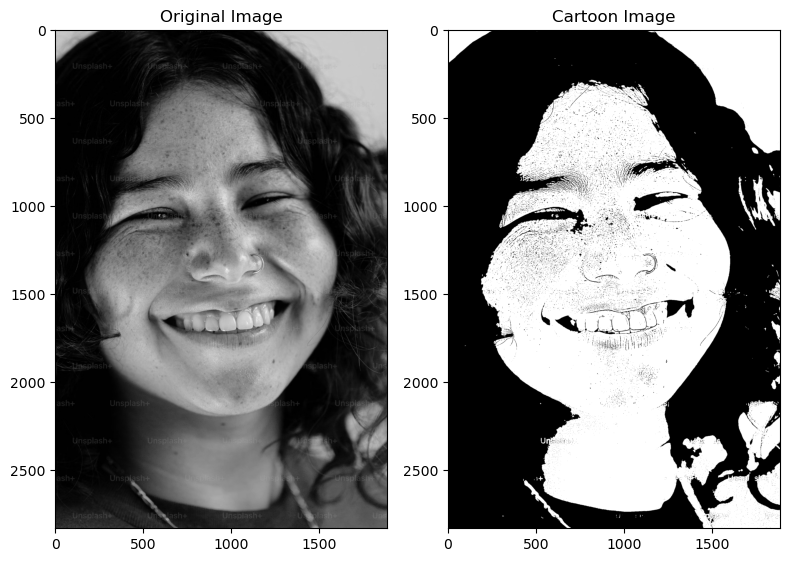

Cartoonified image saved at: out/9_cartoonized.jpg


In [59]:
def Cartoon(image_path, output_path, gamma=0.8, thresh=100):
    img = cv2.imread(image_path)  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    normalized_image = gray / 255.0
    # Apply gamma correction
    corrected_image = np.power(normalized_image, gamma / 1.0)
    corrected_image = np.uint8(corrected_image * 255.0)

    getEdge = cv2.adaptiveThreshold(corrected_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    corrected_image = cv2.equalizeHist(corrected_image)
    smoothed_image = cv2.GaussianBlur(corrected_image, (9, 9), 0)  # gaussian_filter
    a = cv2.bitwise_and(smoothed_image, smoothed_image, mask=getEdge)
    _, black_white_image = cv2.threshold(a, thresh, 255, cv2.THRESH_BINARY)

    # Display the images
    plt.figure(figsize=(8, 6))
    plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(black_white_image, cmap='gray'), plt.title('Cartoon Image')
    plt.tight_layout()
    plt.show()
        # Save the cartoonified image
    cv2.imwrite(output_path, black_white_image)
    print(f"Cartoonified image saved at: {output_path}")

# Assuming your images are in a directory called 'dataset'
image_dir = 'dataset'
output_dir = 'out'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Corrected paths without leading slashes
image_path = 'dataset/9.jpg'
output_path = "out/9_cartoonized.jpg"

# Call the Cartoonifier function
Cartoonifier(image_path, output_path, gamma=0.8, thresh=122)


## Use CNN TO DO THIS WORK FOR ME !

- To make things clearer , since whenever i try to cartoonify a picture i must change the parametres, so i thought why not use a CNN and a data set of original+cartoonified images
- Design an encoder-decoder architecture where the encoder learns to extract features from the realistic image, and the decoder generates the cartoonized version based on these features.

In [68]:
!pip install tensorflow

## CNN

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os

# Define the Encoder
def encoder(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
    return model

# Define the Decoder
def decoder():
    model = models.Sequential()
    # Add Upsampling layers and Conv2DTranspose layers to reconstruct the image
    model.add(layers.UpSampling2D(size=(2, 2)))
    model.add(layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D(size=(2, 2)))
    model.add(layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same'))
    # The output has 1 channel for grayscale images
    return model

# Combine Encoder and Decoder into the full model
def autoencoder(input_shape):
    enc = encoder(input_shape)
    dec = decoder()

    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(enc)
    model.add(dec)

    return model

# Example usage
input_shape = (256, 256, 1)  # 1 channel 
model = autoencoder(input_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary to inspect the architecture
model.summary()

target_size = (256, 256)

def load_and_resize_images(folder_path_original, folder_path_cartoon, target_size=(256, 256)):
    original_images = []
    cartoonified_images = []

    # Get sorted list of filenames psk j'ai les nommer par ordre
    original_filenames = sorted(os.listdir(folder_path_original))
    cartoonified_filenames = sorted(os.listdir(folder_path_cartoon))

    # Ensure that the number of images in both folders is the same
    assert len(original_filenames) == len(cartoonified_filenames), "Mismatch in the number of images"

    for original_filename, cartoonified_filename in zip(original_filenames, cartoonified_filenames):
        original_path = os.path.join(folder_path_original, original_filename)
        cartoonified_path = os.path.join(folder_path_cartoon, cartoonified_filename)
        
        original_img = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
        cartoonified_img = cv2.imread(cartoonified_path, cv2.IMREAD_GRAYSCALE)

        original_img = cv2.resize(original_img, target_size)
        cartoonified_img = cv2.resize(cartoonified_img, target_size)

        original_img = original_img / 255.0  # Normalize pixel values to [0, 1]
        cartoonified_img = cartoonified_img / 255.0

        original_images.append(original_img)
        cartoonified_images.append(cartoonified_img)

    return original_images, cartoonified_images


original_folder = 'dataset'
cartoonified_folder = 'out'

# Load and resize the original images
original_images, cartoonified_images = load_and_resize_images(original_folder, cartoonified_folder, target_size)

# Normalize pixel values to the range [0, 1]
original_images = [img / 255.0 for img in original_images]
cartoonified_images = [img / 255.0 for img in cartoonified_images]

# Pair the images
paired_images = list(zip(original_images, cartoonified_images))

# Split the data into training and validation sets
split_ratio = 0.8
split_index = int(len(paired_images) * split_ratio)

train_data = paired_images[:split_index]
val_data = paired_images[split_index:]

train_original, train_cartoon = zip(*train_data)
val_original, val_cartoon = zip(*val_data)

# Convert lists to numpy arrays
train_original = np.array(train_original)
train_cartoon = np.array(train_cartoon)

val_original = np.array(val_original)
val_cartoon = np.array(val_cartoon)

# Train the model
model.fit(train_original, train_cartoon, epochs=20, batch_size=32, validation_data=(val_original, val_cartoon))


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_21 (Sequential)  (None, 64, 64, 256)       370816    
                                                                 
 sequential_22 (Sequential)  (None, 256, 256, 3)       370563    
                                                                 
Total params: 741379 (2.83 MB)
Trainable params: 741379 (2.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1/1 [==============================] - 21s 21s/step - loss: 0.2475 - val_loss: 0.2458
Epoch 2/20
1/1 [==============================] - 17s 17s/step - loss: 0.2455 - val_loss: 0.2402
Epoch 3/20
1/1 [==============================] - 14s 14s/step - loss: 0.2398 - val_loss: 0.2267
Epoch 4/20
1/1 [==============================] - 14s 14s/step - loss: 0.2262 - val_loss: 0.1971
Epoch 5/20
1/1 [=========

### Trying with new data 

In [29]:
def load_and_preprocess_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return np.expand_dims(img, axis=0)  # Add batch dimension


new_image_path = 'boyy.jpg' 
new_image = load_and_preprocess_image(new_image_path)

# Use the trained model to make predictions
prediction = model.predict(new_image)[0]


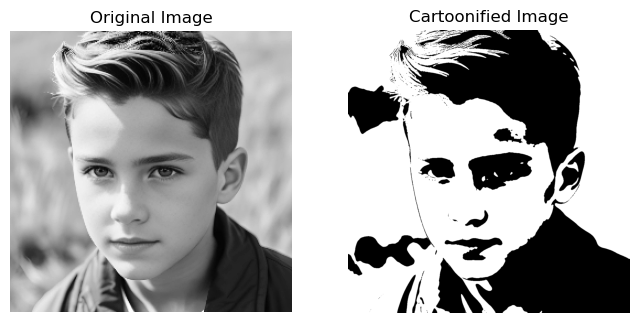

In [31]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(new_image[0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prediction, cmap='gray')
plt.title('Cartoonified Image')
plt.axis('off')

plt.show()
